In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
import plotly.express as px
from datetime import datetime, date
warnings.filterwarnings("ignore")


import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, levene, kruskal
from statsmodels.stats.multicomp import MultiComparison
%pip install scikit-posthocs
import scikit_posthocs as sp

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('WA_Marketing-Campaign.csv')
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


DATA CLEANING

In [ ]:
#Change column names
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['marketid', 'marketsize', 'locationid', 'ageofstore', 'promotion',
       'week', 'salesinthousands'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marketid          548 non-null    int64  
 1   marketsize        548 non-null    object 
 2   locationid        548 non-null    int64  
 3   ageofstore        548 non-null    int64  
 4   promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   salesinthousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [ ]:
# Check Missing Values
df.isnull().sum()

marketid            0
marketsize          0
locationid          0
ageofstore          0
promotion           0
week                0
salesinthousands    0
dtype: int64

In [ ]:
#Check duplicate values
df.duplicated().sum()

0

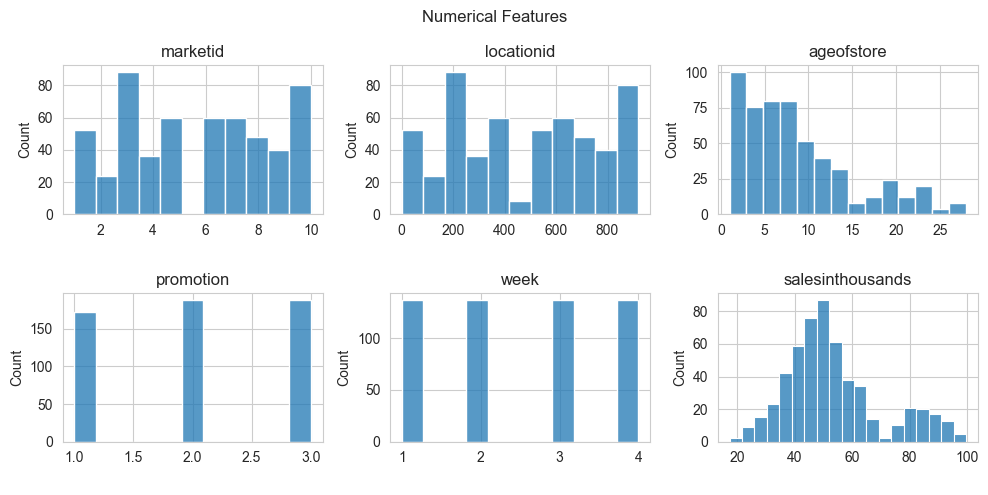

In [ ]:
#Check data accuracy
num_col = df.select_dtypes(['int64','float64'])
fig = plt.figure(figsize = (10,5))
fig.suptitle('Numerical Features')
for i,j in enumerate(num_col):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.histplot(df , x = j)
    ax.set_title(j)
    ax.set_xlabel(' ')
plt.tight_layout()    
plt.show()

Text(0.5, 1.0, 'Categorical Feature')

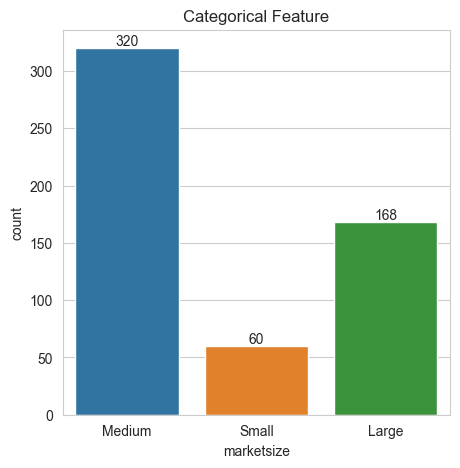

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df , x = 'marketsize')
ax.bar_label(ax.containers[0])
plt.title('Categorical Feature')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
marketid,548.0,5.715328,2.877001,1.00,3.000,6.0,8.0000,10.00
locationid,548.0,479.656934,287.973679,1.00,216.000,504.0,708.0000,920.00
ageofstore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
promotion,548.0,2.029197,0.810729,1.00,1.000,2.0,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.750,2.5,3.2500,4.00
salesinthousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


In [ ]:
df

,marketid,marketsize,locationid,ageofstore,promotion,week,salesinthousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


EDA

In [ ]:
data = df.copy()

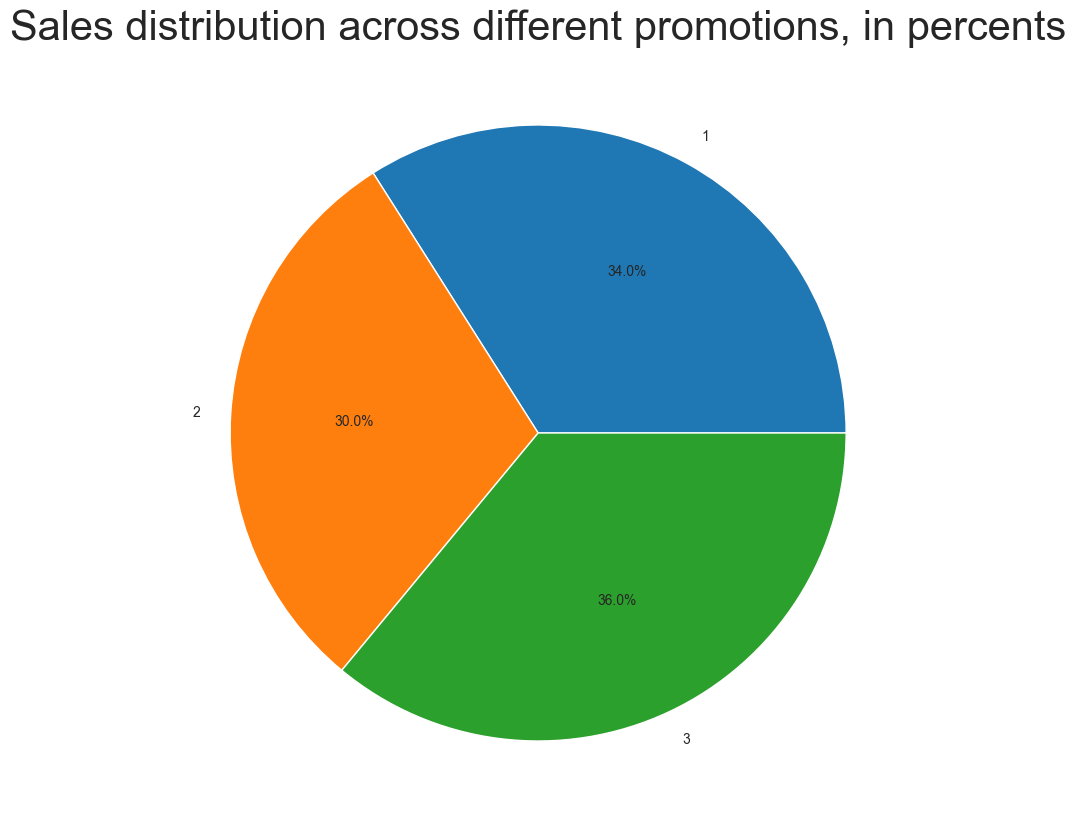

In [ ]:
# Grouping data by Promotion
SalesDist = data.groupby('promotion').agg({'salesinthousands': 'sum'})
SalesDist['percentage'] = round(SalesDist['salesinthousands'] / SalesDist['salesinthousands'].sum() * 100)

# Visualizing data
fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(SalesDist['percentage'], labels=SalesDist.index, autopct='%1.1f%%')
plt.title("Sales distribution across different promotions, in percents", fontsize=30)
plt.show()

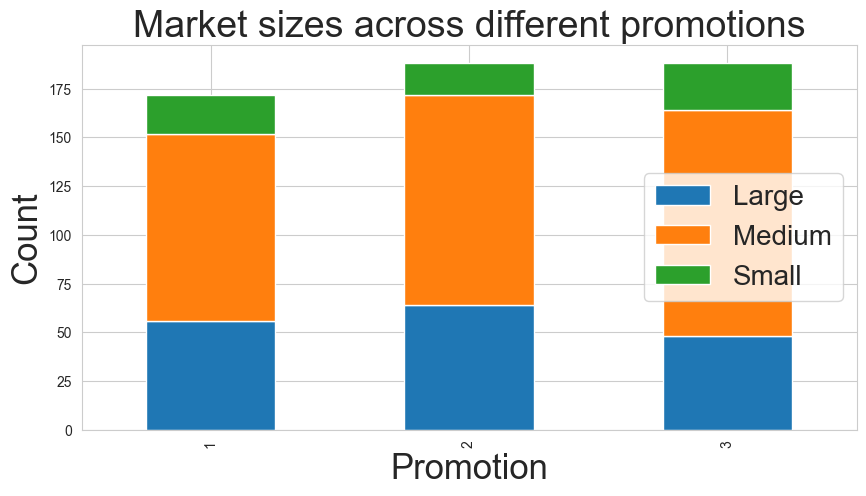

In [ ]:
# Grouping data by Promotion and MarketSize
Market = data.groupby(['promotion', 'marketsize']).size().reset_index(name='count')

# Visualizing data
fig, ax = plt.subplots(figsize=(10, 5))
Market.pivot(index='promotion', columns='marketsize', values='count').plot(kind='bar', stacked=True, ax=ax)
plt.ylabel("Count", fontsize=25)
plt.xlabel("Promotion", fontsize=25)
plt.title("Market sizes across different promotions", fontsize=27)
plt.legend(fontsize=20)
plt.show()

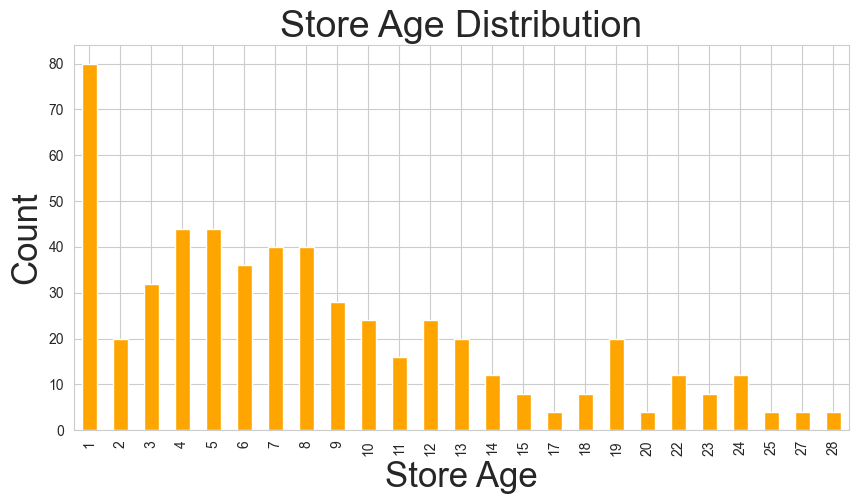

In [ ]:
# Grouping data by AgeOfStore
Age = data.groupby('ageofstore').size().reset_index(name='count-age')

# Visualizing data
fig, ax = plt.subplots(figsize=(10, 5))
Age.plot(kind='bar', x='ageofstore', y='count-age', ax=ax, color='orange', legend=False)
plt.ylabel("Count", fontsize=25)
plt.xlabel("Store Age", fontsize=25)
plt.title("Store Age Distribution", fontsize=27)
plt.show()

Outlier Detection

In [ ]:
def iqrmethod(column , data):
    q1 = np.percentile(data[column] , 25)
    q3 = np.percentile(data[column] , 75)
    IQR = q3-q1
    lower = q1 - (1.5 * IQR)
    upper = q3 + (1.5 * IQR)
    outlier = [i for i in df[column] if i > upper or i < lower]
    return outlier

In [ ]:
outlier = iqrmethod(column = 'salesinthousands' , data = data)

In [ ]:
outlier

[88.73,
 94.17,
 89.7,
 87.43,
 88.12,
 90.3,
 89.77,
 88.91,
 87.7,
 94.21,
 96.48,
 91.98,
 93.71,
 96.01,
 93.03,
 97.61,
 88.07,
 94.43,
 89.44,
 88.64,
 87.9,
 91.6,
 93.86,
 94.89,
 93.63,
 91.61,
 99.65,
 88.64,
 89.25,
 89.32,
 99.12,
 93.32,
 91.29]

QQ Plot

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

qqplot(data[data["promotion"] == 1]["salesinthousands"], line = "s", ax = axs[0])
qqplot(data[data["promotion"] == 2]["salesinthousands"], line = "s", ax = axs[1])
qqplot(data[data["promotion"] == 3]["salesinthousands"], line = "s", ax = axs[2])

axs[0].set_title("Promotion 1")
axs[1].set_title("Promotion 2")
axs[2].set_title("Promotion 3")

plt.show()

NameError: name 'plt' is not defined

In [ ]:
pip install numpy scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


computing t and t value

In [ ]:
from scipy import stats

promo_1 = data[data['promotion'] == 1]['salesinthousands']
promo_2 = data[data['promotion'] == 2]['salesinthousands']
promo_3 = data[data['promotion'] == 3]['salesinthousands']

mean_1 = np.mean(promo_1)
mean_2 = np.mean(promo_2)
mean_3 = np.mean(promo_3)

std_1 = np.std(promo_1)
std_2 = np.std(promo_2)
std_3 = np.std(promo_3)

n_1 = len(promo_1)
n_2 = len(promo_2)
n_3 = len(promo_3)

# Calculating t-value comparing promotion 1 and promotion 2
t_value = (mean_1 - mean_2) / np.sqrt((std_1**2/n_1 + std_2**2/n_2))

# Computing the degrees of freedom
df_1_2 = n_1 + n_2 - 2

# Computing p-value using pt function
p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), df_1_2))

print(t_value)
print(p_value)

5.15612706804561
4.30759828917715e-07


In [ ]:
# Calculating t-value comparing promotion 1 and promotion 3
t_value = (mean_1 - mean_3) / np.sqrt((std_1**2/n_1 + std_3**2/n_3))

# Computing the degrees of freedom
df_1_3 = n_1 + n_3 - 2

# Computing p-value using pt function
p_value = 2 * (1 - stats.t.cdf(np.abs(t_value), df_1_3))

print(t_value)
print(p_value)
print(mean_1)
print(mean_2)
print(mean_3)

0.7810907337576467
0.43531251674882565
54.03753246753247
46.668864864864865
52.905909090909084


In [ ]:
t_stat, p_value = stats.ttest_ind(promo_1, promo_2)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 5.063003534784749
p-value: 6.805440087858443e-07


In [ ]:
t_stat, p_value = stats.ttest_ind(promo_1, promo_3)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.7700931994785927
p-value: 0.4417988891813971
